In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
from plotly.offline import iplot

In [3]:
data1=pd.read_csv(r"C:\Users\Dell\VENVs\jupyter_env\Data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data1.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
def missing(df: pd.DataFrame):
    missing_number=df.isnull().sum().sort_values(ascending=False)
    missing_percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values=pd.concat([missing_number,missing_percent], axis=1, keys=['Missing_Number','Missing_Percentage'])
    return missing_values
missing(data1)

,Missing_Number,Missing_Percentage
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [6]:
data1=data1.drop('customerID',axis=1)

In [7]:
#data1['TotalCharges']=data1['TotalCharges'].apply(lambda x: x if x!=" " else np.nan).astype(float)

In [8]:
data1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***TotalCharges column has object datatype, so we have to convert it into float, but if we convert directly by data1['TotalCharges'].astype(float) then we will get an error because of empty string present in some indexes, that is why we have to split the index value and if length is not equal to 1, then we will fill the position by preceding value***

In [9]:
list1=[len(i.split()) for i in data1['TotalCharges']]
list2=[i for i in range(len(list1)) if list1[i]!=1]
print("index position with empty space:", list2)

for i in list2:
    data1.loc[i, 'TotalCharges'] = data1.loc[(i-1), 'TotalCharges']
data1['TotalCharges']=data1["TotalCharges"].astype(float)

index position with empty space: [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]


In [10]:
missing(data1)

,Missing_Number,Missing_Percentage
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


In [11]:
data1.shape

(7043, 20)

In [12]:
col=list(data1.columns)
Categorical_features=[]
Numerical_features=[]
for i in col:
    if len(data1[i].unique())>6:
        Numerical_features.append(i)
    else:
        Categorical_features.append(i)
print("Numerical_columns: ", Numerical_features)
print("Categorical_columnss: ", Categorical_features)

Numerical_columns:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical_columnss:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
y=data1['Churn']
total_sum=sum(data1["Churn"].value_counts())
NotChurned=(y.value_counts()[0].sum()/total_sum)*100
Churned=(y.value_counts()[1].sum()/total_sum)*100
print("Percentage of churned: ",round(Churned,2), "%")
print("Percentage of not churned: ", round(NotChurned,2),"%")

Percentage of churned:  26.54 %
Percentage of not churned:  73.46 %


C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\193750130.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\193750130.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



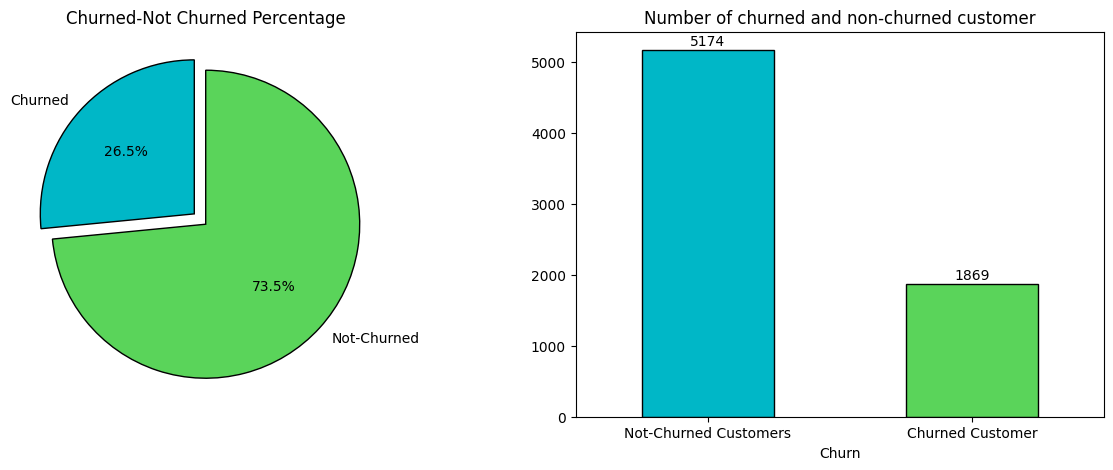

In [14]:
colors=["#b30000", "#7c1158", "#4421af", "#1a53ff", "#0d88e6", "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]
colors1=[ "#00b7c7", "#5ad45a", "#8be04e", "#ebdc78"]

fig=plt.subplots(1,2, figsize=(15,5))
plt.subplot(1,2,1)
plt.pie([Churned, NotChurned], labels=["Churned","Not-Churned"], autopct='%1.1f%%', explode=(0.1,0), colors=colors1, startangle=90,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title("Churned-Not Churned Percentage")

plt.subplot(1,2,2)
ax=data1["Churn"].value_counts().plot(kind='bar', color=colors1, edgecolor='black')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
ax.set_xticklabels(("Not-Churned Customers","Churned Customer"))
plt.xticks(rotation=0)
plt.title("Number of churned and non-churned customer")
plt.show()

In [15]:
#Customer Information
list1=['gender', 'SeniorCitizen', 'Partner', 'Dependents']
#Services
list2=['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
#Payment Information
list3=['Contract', 'PaperlessBilling', 'PaymentMethod']

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\4137883103.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\4137883103.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\4137883103.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\4137883103.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



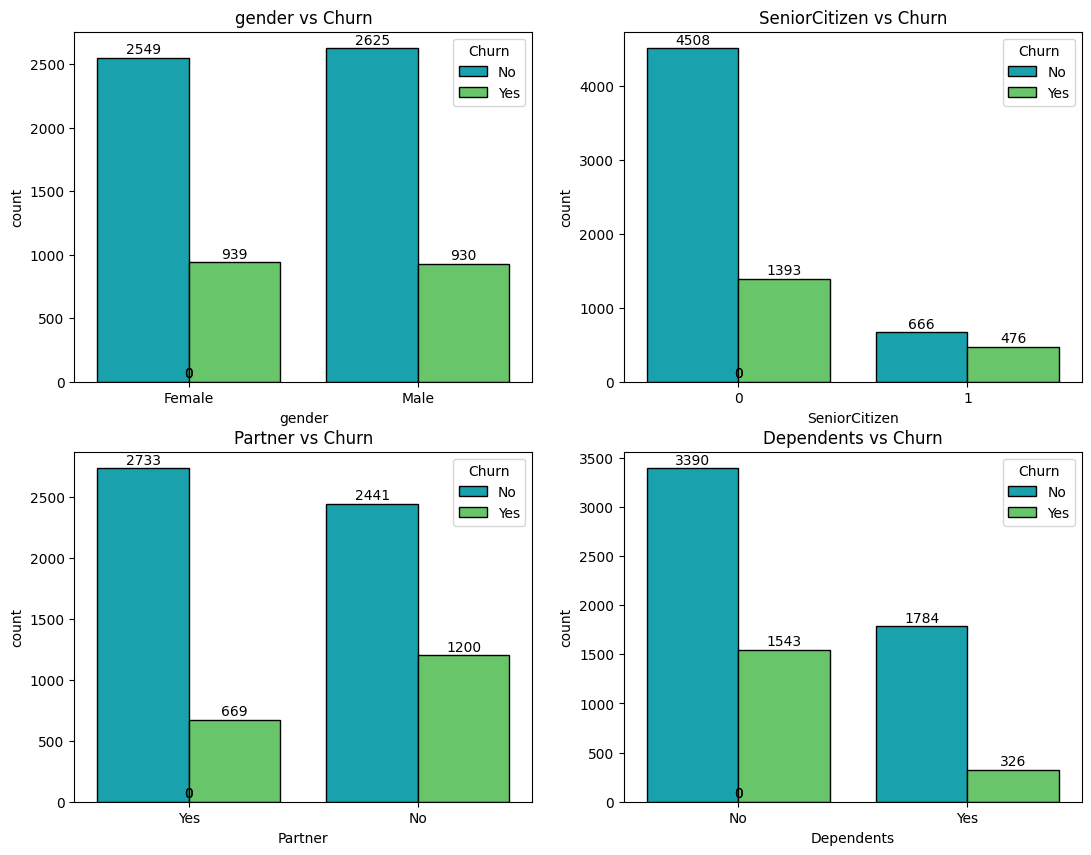

In [16]:
fig=plt.subplots(2,2, figsize=(13,10))
for i in range(len(list1)):
    plt.subplot(2,2,i+1)
    ax=sns.countplot(x=list1[i], data=data1, hue="Churn", palette=colors1, edgecolor='black')
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = "{:.0f}".format(y_value)
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    title = list1[i] + " vs Churn"
    plt.title(title)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:2: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:6: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:6: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:6: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:6: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2693237879.py:6: UserWarning:

The palette list has more values (4) than needed (2)

Text(0.5, 1.0, 'StreamingMovies vs Churn')

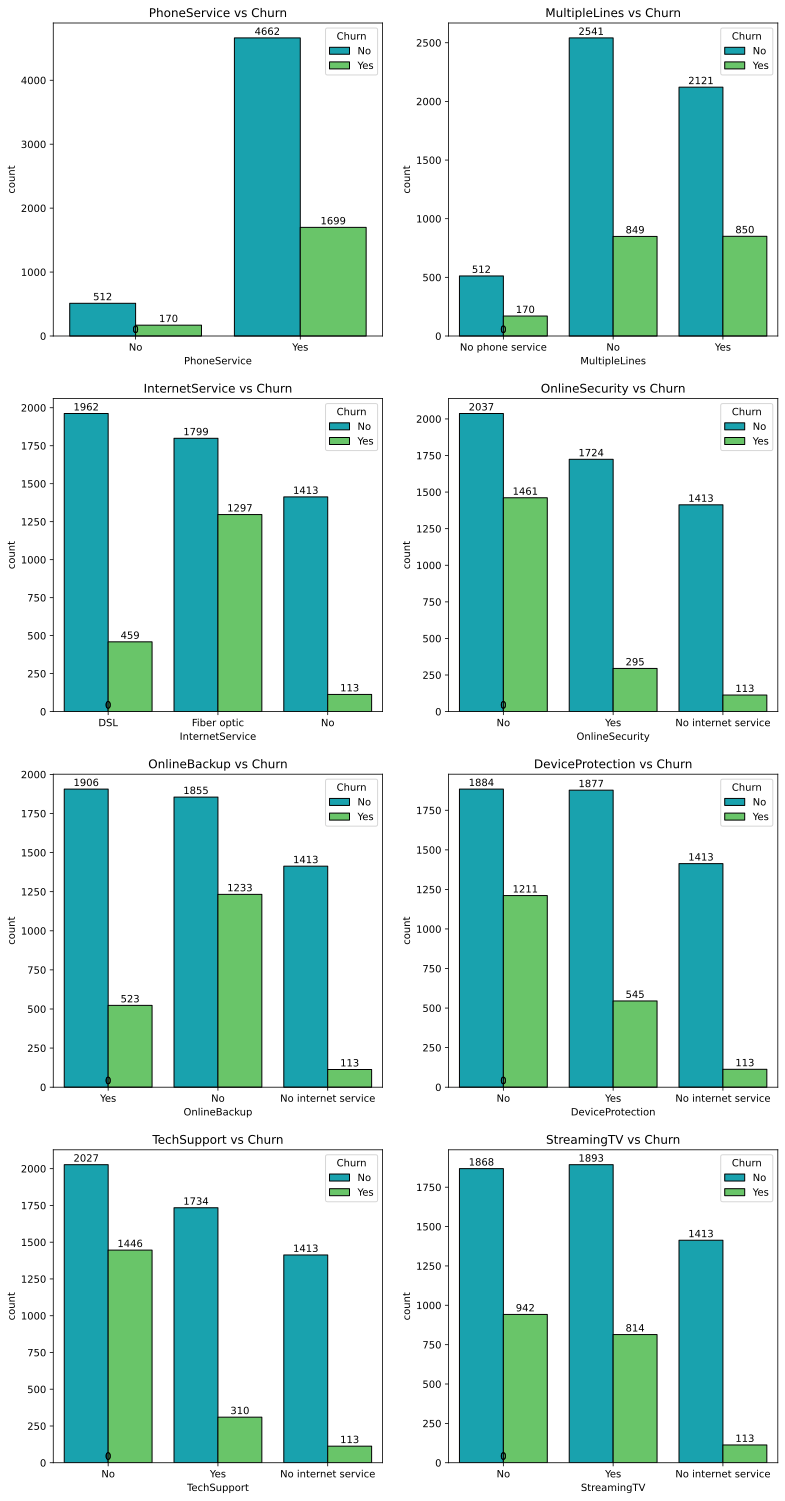

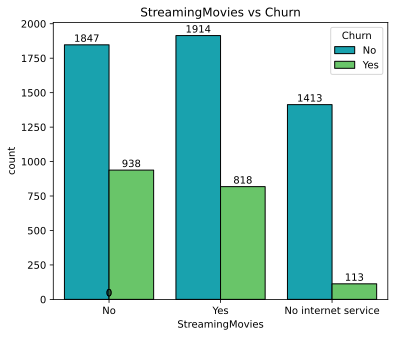

In [17]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
fig=plt.subplots(4,2, figsize=(13,26),gridspec_kw={'wspace':0.2,'hspace':0.2})
for i in range(len(list2)-1):
    plt.subplot(4,2,i+1)
    ax=sns.countplot(x=list2[i], data=data1, hue="Churn", palette=colors1, edgecolor='black')
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = "{:.0f}".format(y_value)
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    title = list2[i] + " vs Churn"
    plt.title(title)

fig=plt.subplots(1,1, figsize=(6,5))
plt.subplot(1,1,1)
ax=sns.countplot(x=list2[-1], data=data1, hue="Churn", palette=colors1, edgecolor='black')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
title = list2[-1] + " vs Churn"
plt.title(title)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\233138310.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\233138310.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\233138310.py:16: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



Text(0.5, 1.0, 'PaymentMethod vs Churn')

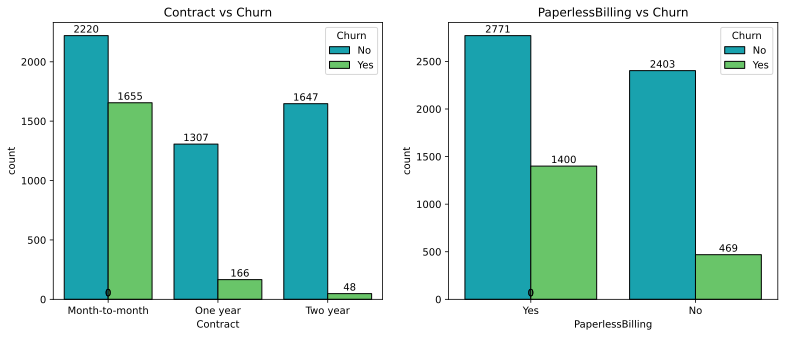

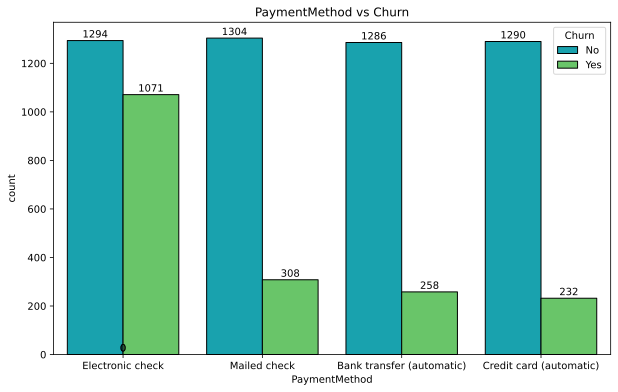

In [18]:
fig=plt.subplots(1,2, figsize=(13,5),gridspec_kw={'wspace':0.2,'hspace':0.2})
for i in range(len(list3)-1):
    plt.subplot(1,2,i+1)
    ax=sns.countplot(x=list3[i], data=data1, hue="Churn", edgecolor='black', palette=colors1)
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = 1
        label = "{:.0f}".format(y_value)
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
    title = list3[i] + " vs Churn"
    plt.title(title)

fig,ax=plt.subplots(1,1, figsize=(10,6))
plt.subplot(1,1,1)
ax=sns.countplot(x=list3[-1], data=data1, hue="Churn", palette=colors1, edgecolor='black')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
title = list3[-1] + " vs Churn"
plt.title(title)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3408162560.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3408162560.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3408162560.py:11: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3408162560.py:15: DeprecationWarning:

`set_matplo

Text(0.5, 1.0, 'Dependents')

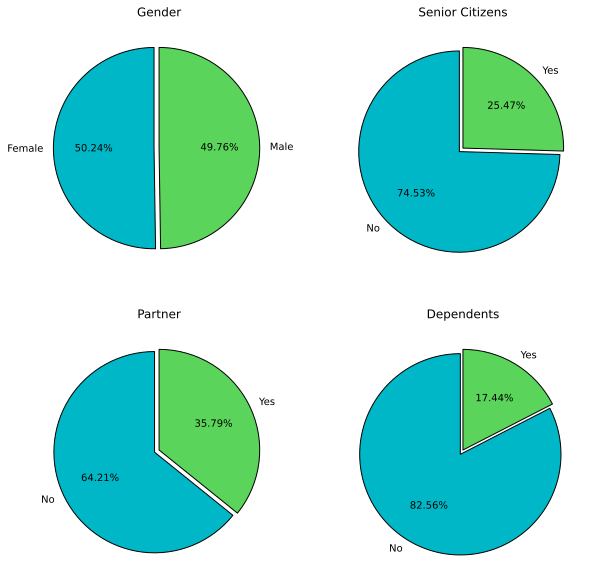

In [19]:
gender=data1[data1['Churn']=='Yes']['gender'].value_counts()
gender=[gender[0]/sum(gender)*100, gender[1]/sum(gender)*100]

senior_citizen=data1[data1['Churn']=='Yes']['SeniorCitizen'].value_counts()
senior_citizen=[senior_citizen[0]/sum(senior_citizen)*100, senior_citizen[1]/sum(senior_citizen)*100]

partner=data1[data1['Churn']=='Yes']['Partner'].value_counts()
partner=[partner[0]/sum(partner)*100, partner[1]/sum(partner)*100]

dependents=data1[data1['Churn']=='Yes']['Dependents'].value_counts()
dependents=[dependents[0]/sum(dependents)*100, dependents[1]/sum(dependents)*100]
#list1=['gender', 'SeniorCitizen', 'Partner', 'Dependents']

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

fig=plt.subplots(2,2, figsize=(10,10), gridspec_kw={'wspace':0.2,'hspace':0.2})
plt.subplot(2,2,1)
plt.pie(gender, labels=["Female","Male"], autopct='%1.2f%%', explode=(0.05,0), colors=colors1, startangle=90,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title("Gender")

plt.subplot(2,2,2)
plt.pie(senior_citizen, labels=["No","Yes"], autopct='%1.2f%%', explode=(0.05,0), colors=colors1, startangle=90,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title("Senior Citizens")

plt.subplot(2,2,3)
plt.pie(partner, labels=["No","Yes"], autopct='%1.2f%%', explode=(0.05,0), colors=colors1, startangle=90,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title("Partner")

plt.subplot(2,2,4)
plt.pie(dependents, labels=["No","Yes"], autopct='%1.2f%%', explode=(0.05,0), colors=colors1, startangle=90,
        wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title("Dependents")

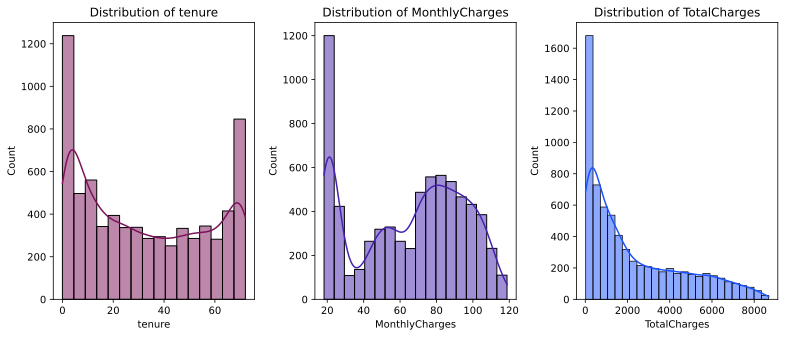

In [20]:
#Numerical Features Distribution
fig=plt.subplots(1,3, figsize=(13,5), gridspec_kw={'wspace':0.3,'hspace':0.2})
for i in range(len(Numerical_features)):
    plt.subplot(1,3, i+1)
    sns.histplot(data1[Numerical_features[i]], color=colors[i+1], kde=True)
    title='Distribution of ' + Numerical_features[i]
    plt.title(title)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\1108889349.py:7: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\1108889349.py:7: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



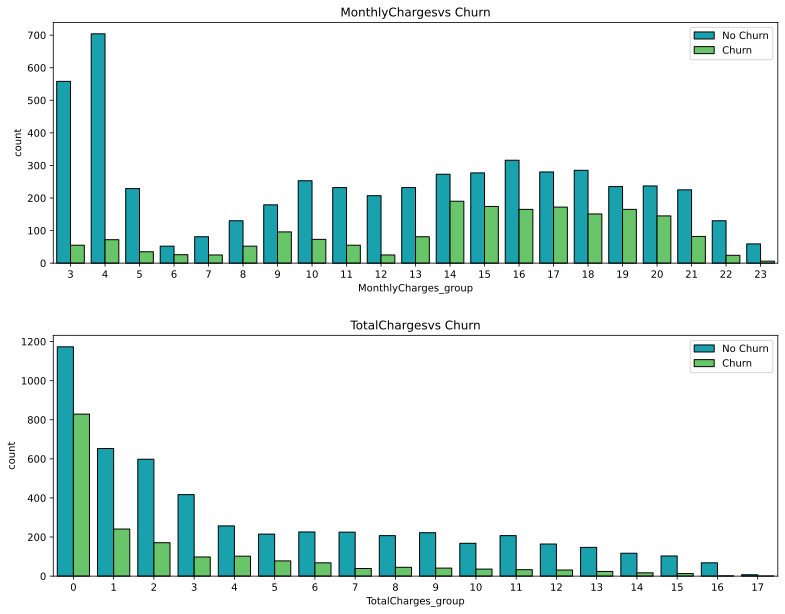

In [22]:
data1['MonthlyCharges_group']=[int(i/5) for i in data1['MonthlyCharges']]
data1['TotalCharges_group']=[int(i/500) for i in data1['TotalCharges']]

fig, ax = plt.subplots(2,1, figsize=(13,10), gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(Numerical_features[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x=Numerical_features[1+i]+'_group',data=data1, hue="Churn", palette=colors1, edgecolor='black')
    plt.legend(['No Churn','Churn'], loc='upper right')
    title=Numerical_features[1+i] + 'vs Churn'
    plt.title(title)

In [23]:
#For monthly charges group, churn rate is very high for values bet. 65(13x5) - 105(21x5), which caused the customer to switch.
#Same in total charges, churning continues in the range of 0(0*5) - 1000(2*500)

In [24]:
#Numerical Features vs Categorical Features w.r.t. Churn

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2423934799.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2423934799.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2423934799.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2423934799.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



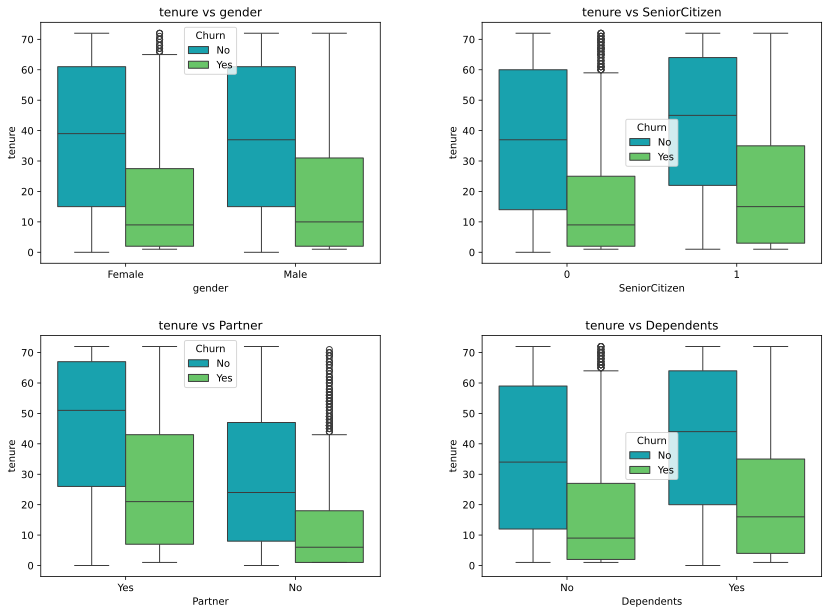

In [25]:
fig= plt.subplots(2,2,figsize=(14,10),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list1)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=list1[i], y='tenure', data=data1, hue="Churn", palette=colors1)
    plt.title('tenure vs '+list1[i])

In [26]:
#Senior citizens choosed to stick for a tenure of 0-35 months, and partners continued with the service for a tenure of 5-45 months.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\2737194156.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\

Text(0.5, 1.0, 'tenure vs StreamingMovies')

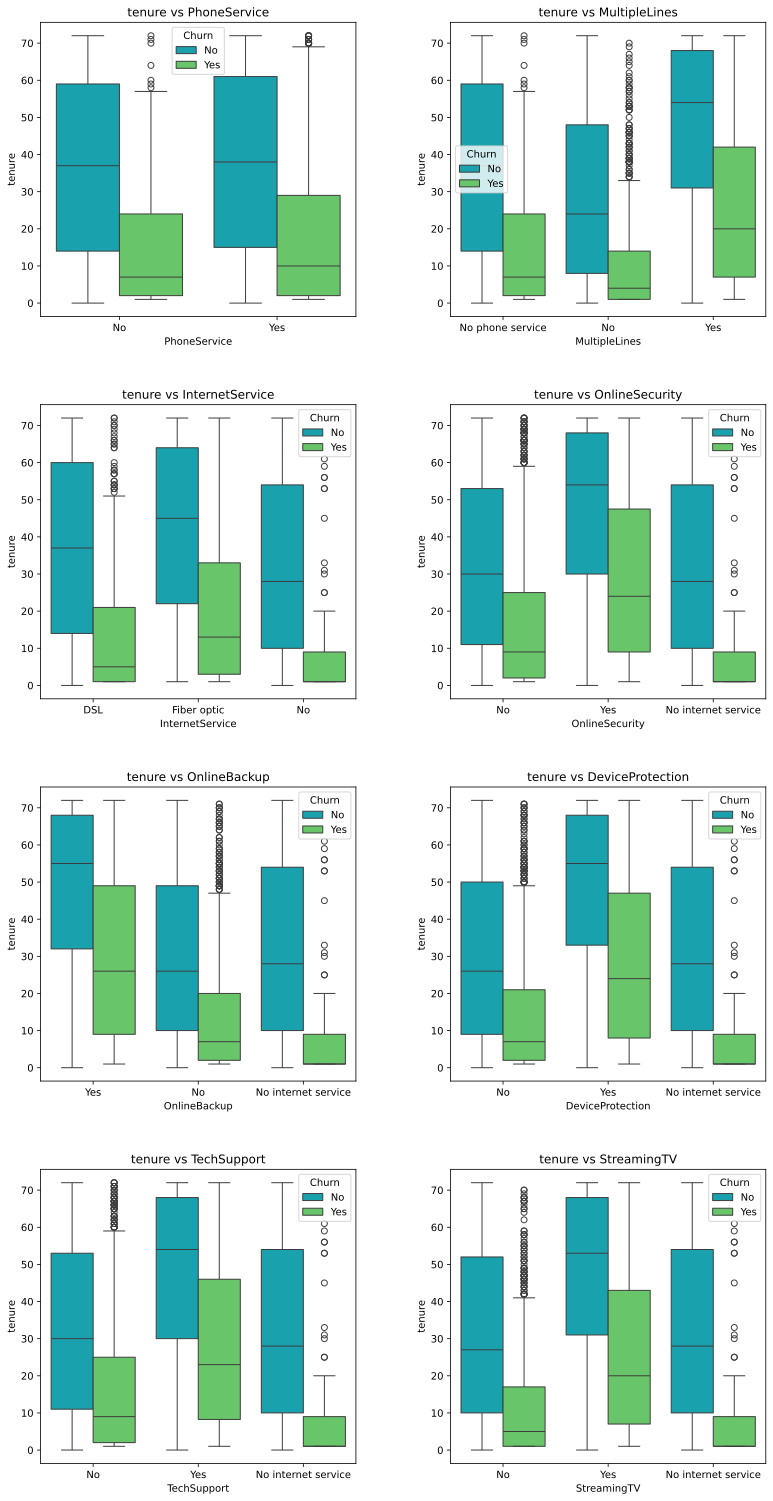

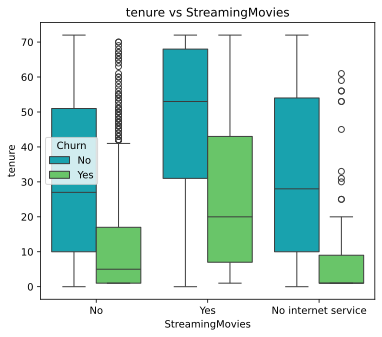

In [27]:
fig= plt.subplots(4,2,figsize=(13,26),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list2[0:-1])):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=list2[i], y='tenure', data=data1, hue="Churn", palette=colors1)
    plt.title('tenure vs '+list2[i])
    
fig= plt.subplots(1,1,figsize=(6,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
plt.subplot(1,1,1)
sns.boxplot(x=list2[-1], y='tenure', data=data1, hue="Churn", palette=colors1)
plt.title('tenure vs '+list2[-1])

In [28]:
#for the internet services, people choosed to be very skeptical about the usages of optical fibre cables as the churning lasted for 30-35 months.
#for the streaming movies and TV, the churning period of about 10-40 months.
#And for online security, backup, device protection and tech support median churn tenure is of 25 months.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\580693188.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\580693188.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\580693188.py:9: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



Text(0.5, 1.0, 'tenure vs PaymentMethod')

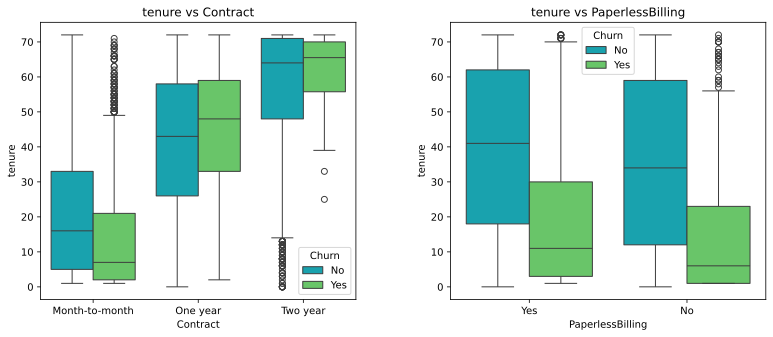

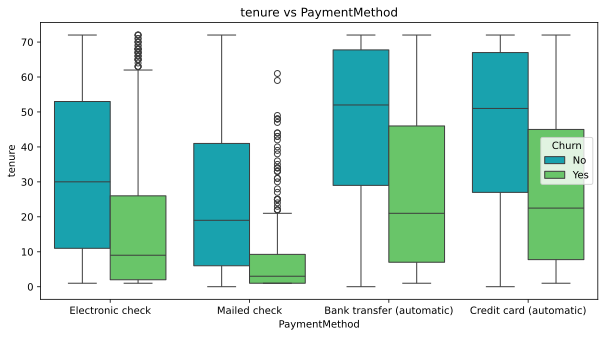

In [29]:
fig= plt.subplots(1,2,figsize=(13,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list3[0:2])):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=list3[i], y='tenure', data=data1, hue="Churn", palette=colors1)
    plt.title('tenure vs '+list3[i])

fig= plt.subplots(1,1,figsize=(10,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
plt.subplot(1,1,1)
sns.boxplot(x=list3[-1], y='tenure', data=data1, hue="Churn", palette=colors1)
plt.title('tenure vs '+list3[-1])

In [30]:
#when customers sign one year or two year contract, then they continue for the service for 25 to 45 months, however they started to switch from 35 months to 55 months, respectively.
#When it comes to Payment method, churn tenure for bank transfer and credit card is above 20 months.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\805928524.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\805928524.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\805928524.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\805928524.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



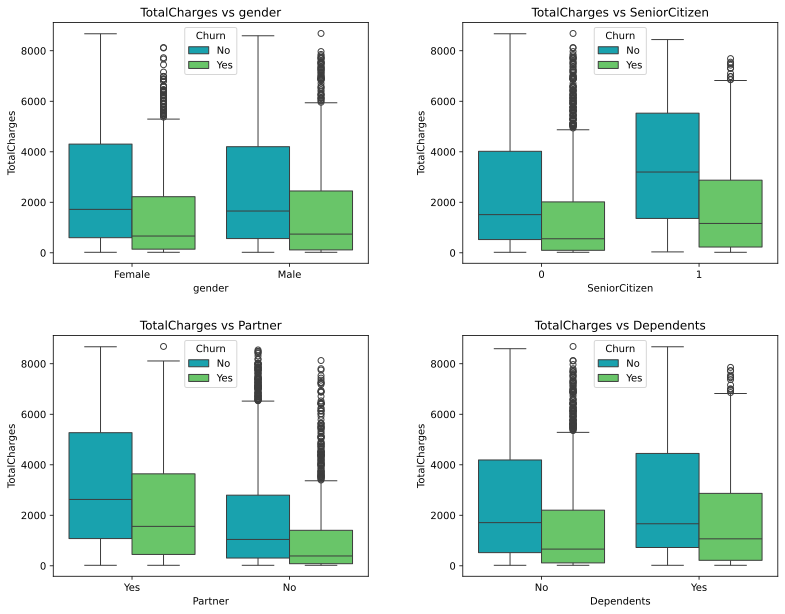

In [31]:
fig= plt.subplots(2,2,figsize=(13,10),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list1)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=list1[i], y='TotalCharges', data=data1, hue="Churn", palette=colors1)
    plt.title('TotalCharges vs '+list1[i])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\3582608354.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\

Text(0.5, 1.0, 'Total Charges vs StreamingMovies')

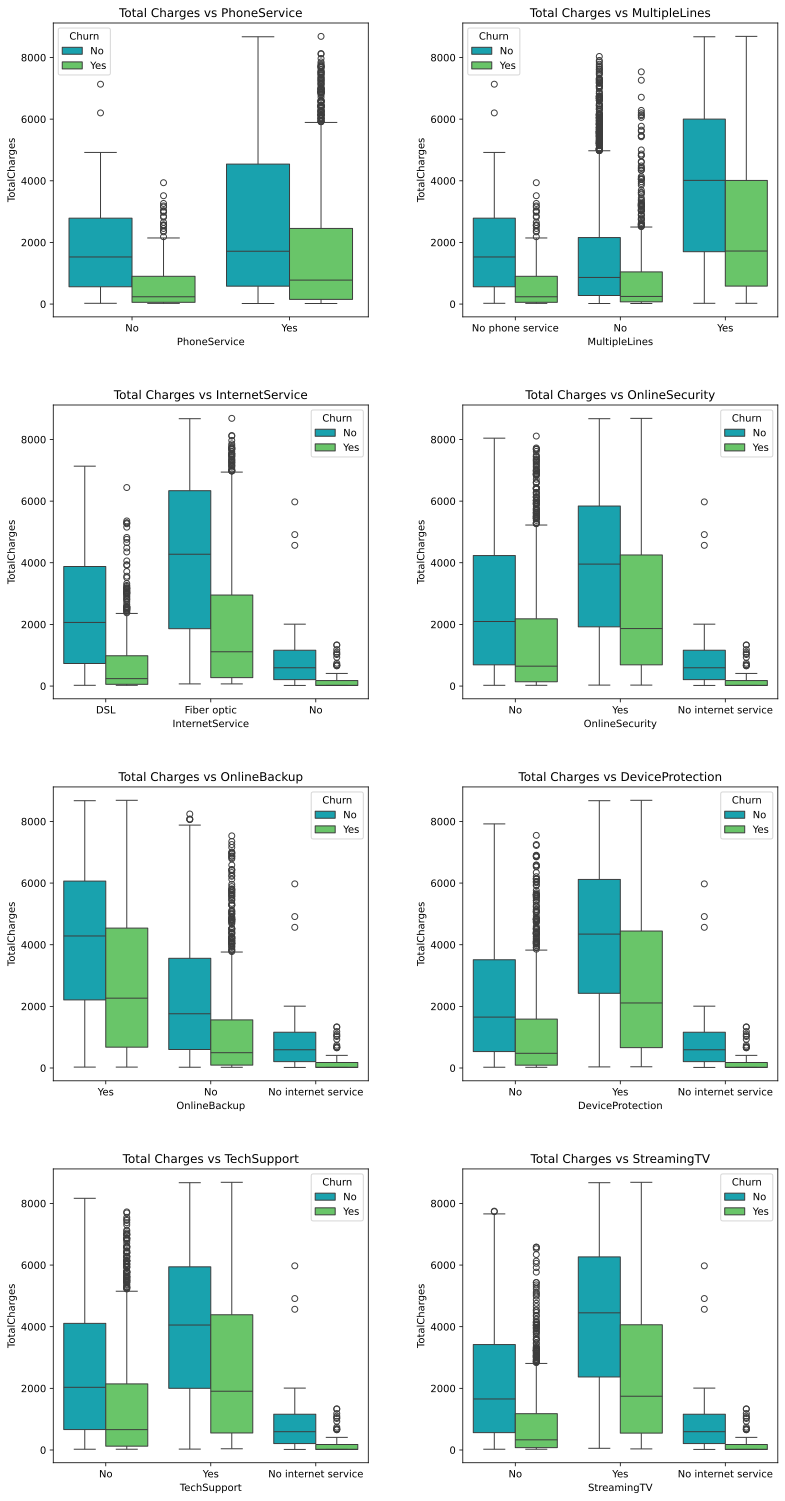

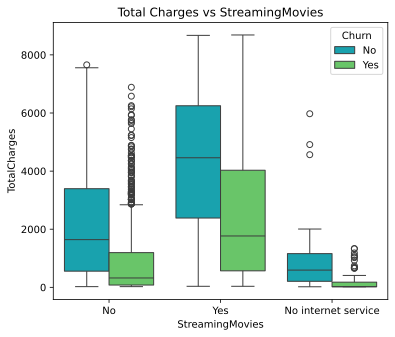

In [32]:
fig= plt.subplots(4,2,figsize=(13,26),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list2[0:-1])):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=list2[i], y='TotalCharges', data=data1, hue="Churn", palette=colors1)
    plt.title('Total Charges vs '+list2[i])
    
fig= plt.subplots(1,1,figsize=(6,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
plt.subplot(1,1,1)
sns.boxplot(x=list2[-1], y='TotalCharges', data=data1, hue="Churn", palette=colors1)
plt.title('Total Charges vs '+list2[-1])

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\282627594.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\282627594.py:4: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.

C:\Users\Dell\AppData\Local\Temp\ipykernel_15412\282627594.py:9: UserWarning:

The palette list has more values (4) than needed (2), which may not be intended.



Text(0.5, 1.0, 'TotalCharges vs PaymentMethod')

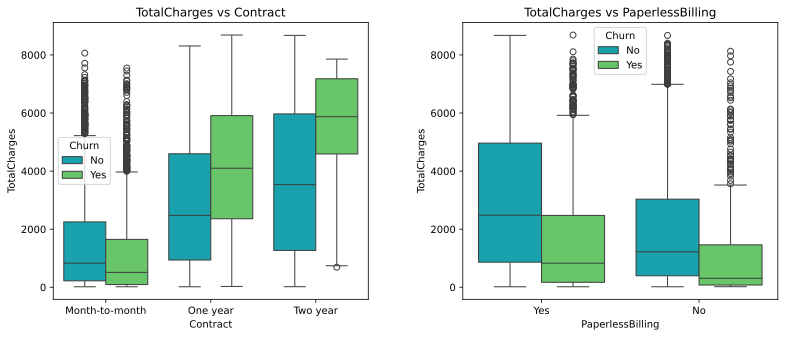

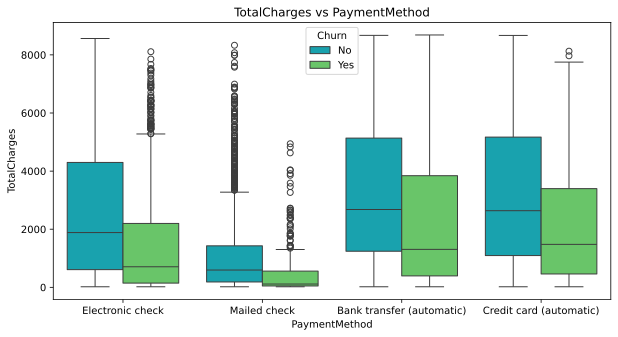

In [33]:
fig= plt.subplots(1,2,figsize=(13,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
for i in range(len(list3[0:2])):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=list3[i], y='TotalCharges', data=data1, hue="Churn", palette=colors1)
    plt.title('TotalCharges vs '+list3[i])

fig= plt.subplots(1,1,figsize=(10,5),gridspec_kw={'wspace':0.3,'hspace':0.3})
plt.subplot(1,1,1)
sns.boxplot(x=list3[-1], y='TotalCharges', data=data1, hue="Churn", palette=colors1)
plt.title('TotalCharges vs '+list3[-1])

In [34]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_group',
       'TotalCharges_group'],
      dtype='object')

In [35]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group,TotalCharges_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,5,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,11,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,10,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,8,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,14,0


In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms= MinMaxScaler()
data1.drop(columns=['MonthlyCharges_group','TotalCharges_group'], inplace=True)
data1['tenure']=mms.fit_transform(data1[['tenure']])
data1['MonthlyCharges']=mms.fit_transform(data1[['MonthlyCharges']])
data1['TotalCharges']=mms.fit_transform(data1[['TotalCharges']])
data1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,No
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,No
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,Yes
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,No
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,Yes


In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [38]:
cat_columns=data1.select_dtypes(include=['object']).columns
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_columns:
    data1[i]=le.fit_transform(data1[i])

In [40]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1


In [41]:
data1.shape

(7043, 20)

<Axes: >

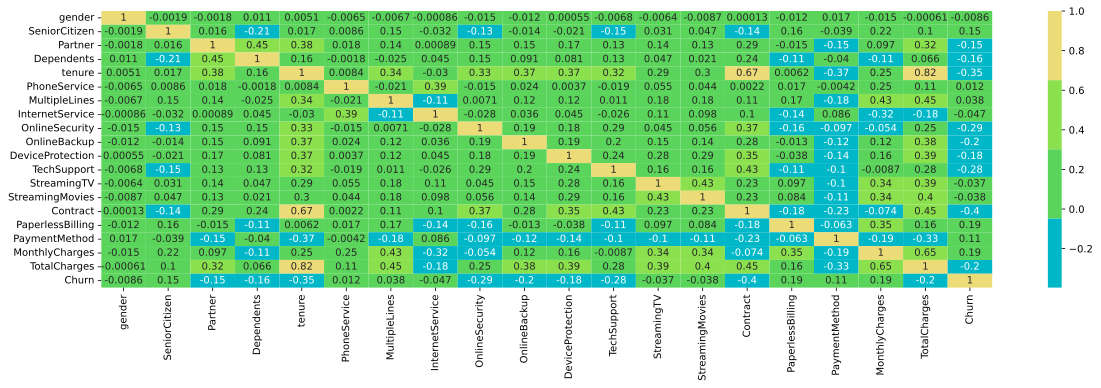

In [42]:
plt.figure(figsize=(20,5))
sns.heatmap(data1.corr(),cmap=colors1, annot=True)

In [43]:
corr=data1.corrwith(data1['Churn']).sort_values(ascending=False).to_frame()

Text(0.5, 1.0, 'Correlation with Churn')

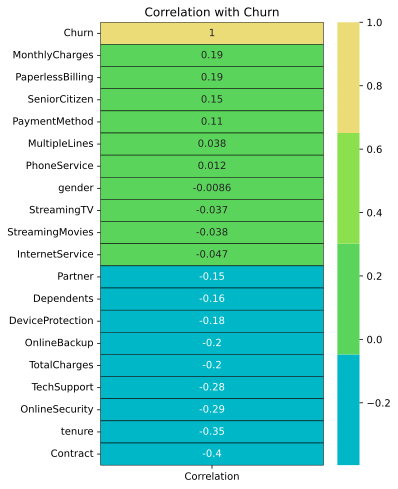

In [44]:
plt.figure(figsize=(5,8))
corr.columns=['Correlation']
sns.heatmap(corr, annot=True, cmap=colors1, linewidths=0.5, linecolor='black')
plt.title('Correlation with Churn')

In [45]:
#We would drop gender, Streaming TV, Movies and Internet service, because it has no very negligible correlation cofficeint like (-0.01, 0.01).

Feature Selection of Categorical features using Chi Squared Test

In [46]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

Text(0.5, 1.0, 'Selection of categorical features')

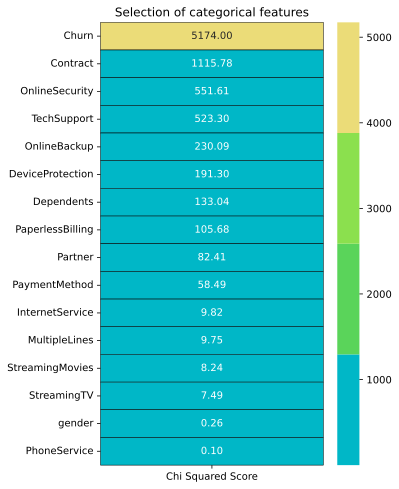

In [47]:
features=data1.loc[:,cat_columns]
target=data1.loc[:,'Churn']

best_features=SelectKBest(score_func=chi2,k='all')
fit=best_features.fit(features, target)
featureScores=pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

plt.figure(figsize=(5,8))
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap=colors1, linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Selection of categorical features')

In [48]:
##We would drop gender, Streaming TV, Movies, Internet service and MultipleLines, because it has very low chi square test w.r.t to Churn

Feature Selection of Numerical features using ANOVA Test

In [49]:
Numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

Text(0.5, 1.0, 'Selection of Numerical features')

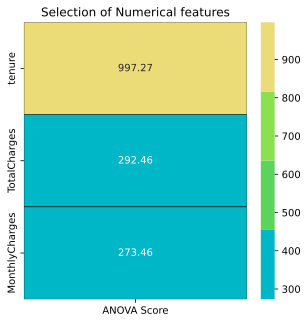

In [50]:
from sklearn.feature_selection import f_classif

features=data1.loc[:,Numerical_features]
target=data1.loc[:,'Churn']

best_features=SelectKBest(score_func=f_classif,k='all')
fit=best_features.fit(features, target)
featureScores=pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

plt.figure(figsize=(5,5))
sns.heatmap(featureScores.sort_values(ascending=False, by='ANOVA Score'), annot=True, cmap=colors1, linewidths=0.5, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical features')

In [51]:
#if higher the value of ANOVA score, higher the important respective feature.

In [52]:
cat_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [53]:
data1.drop(columns=['PhoneService','MultipleLines','gender','StreamingMovies','StreamingTV','InternetService'], inplace=True)
data1.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.013889,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.472222,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.027778,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.625000,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.027778,0,0,0,0,0,1,2,0.521891,0.015330,1


In [54]:
data1.shape

(7043, 14)

**Data balancing using SMOTE method**

In [55]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [56]:
over= SMOTE(sampling_strategy=1)
feature1 = data1.iloc[:,:13].values
target1 = data1.iloc[:,13].values

feature1, target1 = over.fit_resample(feature1, target1)
Counter(target1)

Counter({0: 5174, 1: 5174})

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, precision_recall_curve, RocCurveDisplay, f1_score
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt

In [58]:
x_train, x_test, y_train, y_test = train_test_split(feature1, target1, test_size=0.2, random_state=2)

In [59]:
def model(classifier, x_train, x_test, y_train, y_test):
    

    classifier.fit(x_train, y_train)

    # Predict probabilities instead of classes for roc_auc_score
    predicted_probs = classifier.predict_proba(x_test)[:, 1]  # Probabilities for ROC-AUC
    predictions = classifier.predict(x_test)

    # Cross-validation setup
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()

    # Calculate the metrics
    acc = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    roc_auc = roc_auc_score(y_test, predicted_probs)
    
    # Print scores
    print("Cross Validation Score: ", '{0:.2%}'.format(cv_score))
    print("ROC-AUC Score: ", '{0:.2%}'.format(roc_auc_score(y_test, predictions)))
    print('\n')
    
    # Plot ROC-AUC Curve
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title("ROC-AUC Curve")
    plt.show()
    
    return acc, f1, roc_auc, cv_score

def ModelEvaluation(classifier, x_test, y_test):
    cm=confusion_matrix(y_test, classifier.predict(x_test))
    names=["True neg", "False Pos", "False Neg", "True Pos"]
    counts=[val for val in cm.flatten()]
    percentage=['{0:.2%}'.format(val) for val in cm.flatten()/np.sum(cm)]
    labels=[f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentage)]
    labels=np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot=labels, cmap=colors1, fmt='')
    plt.show()
    print('\n')
    print(classification_report(y_test, classifier.predict(x_test)))

In [60]:
from catboost import CatBoostClassifier
#catboost_model=CatBoostClassifier(learning_rate=0.2742088, verbose=0)
#model(catboost_model, x_train, x_test, y_train, y_test)

In [61]:
from xgboost import XGBClassifier
#xgb_model = XGBClassifier(verbosity=0)
#model(xgb_model, x_train, x_test, y_train, y_test)

In [62]:
from sklearn.ensemble import RandomForestClassifier
#random_forst=RandomForestClassifier()
#model(random_forst, x_train, x_test, y_train, y_test)

In [63]:
models={
    "Hist Gradient Boosting": HistGradientBoostingClassifier(),
    "Cat Boosting": CatBoostClassifier(learning_rate=0.2742088, verbose=0),
    "XG Boost Classifier": XGBClassifier(verbosity=0),
    "Random Forest Classifier": RandomForestClassifier()
}

models_score=[]

def Evaluate_models(models, x_train, x_test, y_train, y_test):
    results=[]
    for name, model1 in models.items():
        print('Algorithm: ', name,'\n')
        acc, f1, roc_auc, cv_score=model(model1, x_train, x_test, y_train, y_test)
        ModelEvaluation(model1, x_test, y_test)
        print('\n')
        #acc, f1, roc_auc, cv_score=model(model1, x_train, x_test, y_train, y_test)
        models_score.append({
            'Model': name,
            'Accuracy': acc,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Cross-Val Score': cv_score
            })
        result_df=pd.DataFrame(models_score)
    return result_df

Algorithm:  Hist Gradient Boosting 

Cross Validation Score:  91.25%
ROC-AUC Score:  83.78%




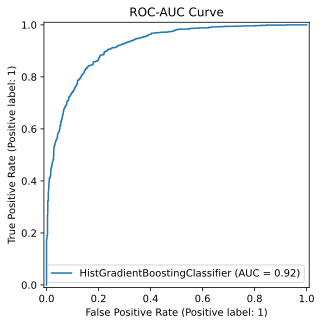

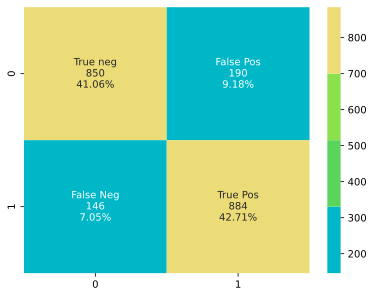



              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1040
           1       0.82      0.86      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



Algorithm:  Cat Boosting 

Cross Validation Score:  91.58%
ROC-AUC Score:  84.35%




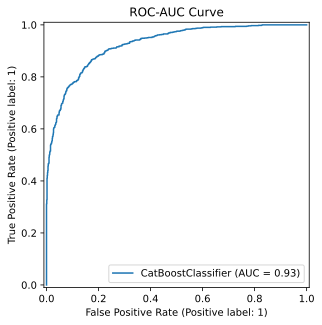

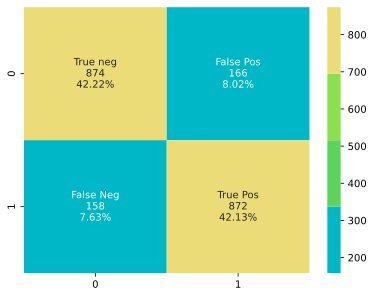



              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1040
           1       0.84      0.85      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



Algorithm:  XG Boost Classifier 

Cross Validation Score:  91.88%
ROC-AUC Score:  84.31%




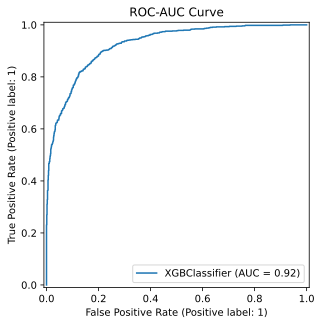

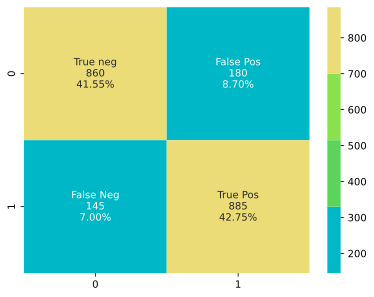



              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1040
           1       0.83      0.86      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



Algorithm:  Random Forest Classifier 

Cross Validation Score:  90.21%
ROC-AUC Score:  83.68%




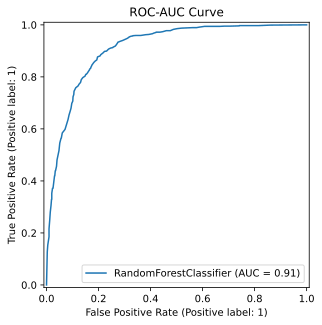

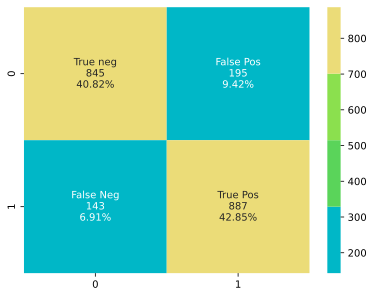



              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1040
           1       0.82      0.86      0.84      1030

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070





,Model,Accuracy,F1 Score,ROC AUC,Cross-Val Score
0,Hist Gradient Boosting,0.837681,0.837624,0.918810,0.912495
1,Cat Boosting,0.843478,0.843479,0.925766,0.915827
2,XG Boost Classifier,0.842995,0.842963,0.924712,0.918799
3,Random Forest Classifier,0.836715,0.836632,0.911280,0.902132


In [64]:
Evaluate_models(models, x_train, x_test, y_train, y_test)

In [65]:
result_df1=pd.DataFrame(models_score)

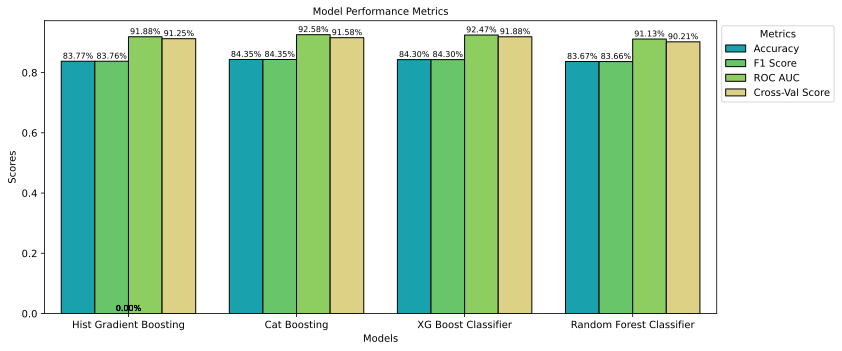

In [66]:
results_melted = result_df1.melt(id_vars=["Model"], var_name="Metric", value_name="Score")

# Plotting
plt.subplots(figsize=(11.8,5))
ax=sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric", palette=colors1, edgecolor='black', dodge=True, width=0.8)
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.2f}"'%'.format(y_value*100)
    ax.annotate(label, (x_value, y_value), xytext=(0,space), textcoords="offset points", ha='center', va='bottom', fontsize=8)
plt.title("Model Performance Metrics", fontsize=10)
plt.ylabel("Scores", fontsize=10)
plt.xlabel("Models", fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title="Metrics", fontsize=10, bbox_to_anchor=(0.999999, 1), loc='upper left', borderaxespad=0.5)
plt.tight_layout()
plt.show()

**We can also run the models through various parameters using optimisation algorithms like RandomSearchCV or GridSearchCV for better results.**